# creating the model

In [67]:
from keras.models import Sequential

In [68]:
model = Sequential()

# adding layers

In [69]:
from keras.layers import Dense

model.add(Dense(units=1, activation='relu', input_dim=2))
model.add(Dense(units=1, activation='softmax'))

# learning process

In [70]:
#sparse_categorical_crossentropy => target as numbers
#categorical_crossentropy => target as binary

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Configuring the optimizer

In [71]:
import keras

#model.compile(loss=keras.losses.categorical_crossentropy,
#              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True))

# generating dummy data

In [72]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

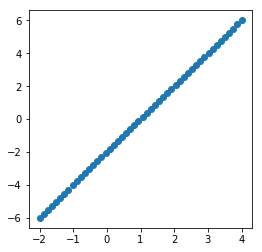

In [73]:
num_examples = 50
# linspace: generates linear samples from the initial point (-2) to the final point (4)
X = np.array([np.linspace(-2, 4, num_examples), np.linspace(-6, 6, num_examples)])
X = np.transpose(X)
plt.figure(figsize=(4,4))
plt.scatter(np.transpose(X)[0], np.transpose(X)[1])
plt.show()

In [74]:
X

array([[-2.        , -6.        ],
       [-1.87755102, -5.75510204],
       [-1.75510204, -5.51020408],
       [-1.63265306, -5.26530612],
       [-1.51020408, -5.02040816],
       [-1.3877551 , -4.7755102 ],
       [-1.26530612, -4.53061224],
       [-1.14285714, -4.28571429],
       [-1.02040816, -4.04081633],
       [-0.89795918, -3.79591837],
       [-0.7755102 , -3.55102041],
       [-0.65306122, -3.30612245],
       [-0.53061224, -3.06122449],
       [-0.40816327, -2.81632653],
       [-0.28571429, -2.57142857],
       [-0.16326531, -2.32653061],
       [-0.04081633, -2.08163265],
       [ 0.08163265, -1.83673469],
       [ 0.20408163, -1.59183673],
       [ 0.32653061, -1.34693878],
       [ 0.44897959, -1.10204082],
       [ 0.57142857, -0.85714286],
       [ 0.69387755, -0.6122449 ],
       [ 0.81632653, -0.36734694],
       [ 0.93877551, -0.12244898],
       [ 1.06122449,  0.12244898],
       [ 1.18367347,  0.36734694],
       [ 1.30612245,  0.6122449 ],
       [ 1.42857143,

In [75]:
np.random.randn(2, num_examples).shape

(2, 50)

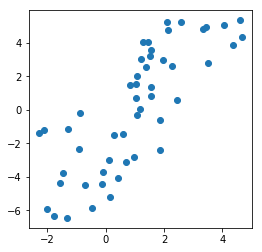

In [76]:
# generate noisy on the linear data

X += np.transpose(np.random.randn(2, num_examples))
plt.figure(figsize=(4,4))
plt.scatter(np.transpose(X)[0], np.transpose(X)[1])
plt.show()

In [77]:
X.shape

(50, 2)

In [78]:
y = np.random.randint(2, size=(50)).astype(float)/2

In [79]:
y.shape

(50,)

In [80]:
y

array([ 0.5,  0. ,  0. ,  0.5,  0.5,  0.5,  0. ,  0.5,  0. ,  0. ,  0.5,
        0.5,  0.5,  0.5,  0.5,  0. ,  0.5,  0. ,  0.5,  0. ,  0. ,  0. ,
        0. ,  0.5,  0.5,  0.5,  0. ,  0. ,  0.5,  0. ,  0. ,  0.5,  0. ,
        0.5,  0.5,  0. ,  0. ,  0.5,  0.5,  0. ,  0.5,  0.5,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0.5])

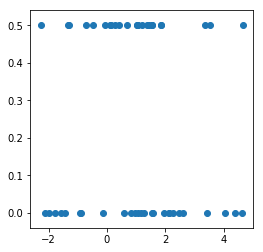

In [81]:
plt.figure(figsize=(4,4))
plt.scatter(np.transpose(X)[0], y)
plt.show()

# train the model

In [82]:
np.transpose(np.transpose(X)[0])

array([ 0.14387052, -1.79323357, -2.00108577, -0.48930092, -0.72616863,
       -1.32212464, -1.57198095,  0.40360946, -1.45083365, -0.13112366,
        0.09615077, -0.08266987, -2.27391708,  0.69730853,  0.2780958 ,
       -0.93433735, -1.28544117,  0.95031126,  1.86361087, -0.89756923,
       -2.13082008,  0.57924641,  1.17185778,  1.54796138,  1.86563433,
        1.03870515,  1.05509957,  1.56514786,  1.06039779,  0.8397969 ,
        1.52938796,  1.36237336,  2.45647998,  1.20805941,  1.02106026,
        1.28010872,  2.27164051,  3.52042153,  3.34988476,  2.11799432,
        1.55574359,  1.45367113,  1.96275894,  4.37767315,  2.59311514,
        3.44618528,  4.61893855,  2.11348481,  4.03756892,  4.65763113])

In [83]:
np.transpose(np.transpose(X)[1])

array([-5.18525553, -6.34796461, -5.91830606, -5.88422879, -4.47286596,
       -6.44657419, -4.40099127, -4.10008836, -3.80415194, -4.43703699,
       -2.98253026, -3.71337726, -1.39844752, -3.11212735, -1.47637218,
       -2.35444138, -1.13195085, -2.81845894, -2.42520711, -0.18342763,
       -1.21972676, -1.45520582,  0.04679973,  1.35366422, -0.59552819,
        0.73451578, -0.2923345 ,  0.83728403,  2.01313772,  1.48236711,
        3.22809761,  2.59009403,  0.59180353,  3.05525569,  1.52016297,
        4.05677715,  2.63932537,  2.77907822,  4.81890314,  4.78652323,
        3.59738395,  4.05240223,  2.96950272,  3.86684895,  5.25702254,
        4.97803574,  5.34170924,  5.22918326,  5.09105828,  4.358742  ])

In [84]:
# x_train and y_train are Numpy arrays --just like in the Scikit-Learn API.
model.fit(X, y, epochs=5, batch_size=50)

Epoch 1/5
50/50 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 2/5
50/50 [==============================] - 0s 50us/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 3/5
50/50 [==============================] - 0s 36us/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 4/5
50/50 [==============================] - 0s 31us/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 5/5
50/50 [==============================] - 0s 42us/step - loss: 0.0000e+00 - acc: 0.0000e+00


In [18]:
# For a single-input model with 2 classes (binary classification):

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Generate dummy data
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(2, size=(1000, 1))

# Train the model, iterating on the data in batches of 32 samples
model.fit(data, labels, epochs=10, batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 0s 254us/step - loss: 0.7019 - acc: 0.5040
Epoch 2/10
1000/1000 [==============================] - 0s 69us/step - loss: 0.6923 - acc: 0.5350
Epoch 3/10
1000/1000 [==============================] - 0s 67us/step - loss: 0.6899 - acc: 0.5460
Epoch 4/10
1000/1000 [==============================] - 0s 69us/step - loss: 0.6835 - acc: 0.5490
Epoch 5/10
1000/1000 [==============================] - 0s 65us/step - loss: 0.6803 - acc: 0.5530
Epoch 6/10
1000/1000 [==============================] - 0s 66us/step - loss: 0.6778 - acc: 0.5690
Epoch 7/10
1000/1000 [==============================] - 0s 59us/step - loss: 0.6750 - acc: 0.5790
Epoch 8/10
1000/1000 [==============================] - 0s 64us/step - loss: 0.6723 - acc: 0.5710
Epoch 9/10
1000/1000 [==============================] - 0s 65us/step - loss: 0.6701 - acc: 0.5880
Epoch 10/10
1000/1000 [==============================] - 0s 64us/step - loss: 0.6670 - acc: 0.6000


In [19]:
# For a single-input model with 10 classes (categorical classification):

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Generate dummy data
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(10, size=(1000, 1))

# Convert labels to categorical one-hot encoding
one_hot_labels = keras.utils.to_categorical(labels, num_classes=10)

# Train the model, iterating on the data in batches of 32 samples
model.fit(data, one_hot_labels, epochs=10, batch_size=32)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Epoch 1/10
1000/1000 [==============================] - 0s 223us/step - loss: 2.3657 - acc: 0.0940
Epoch 2/10
1000/1000 [==============================] - 0s 68us/step - loss: 2.3203 - acc: 0.1050
Epoch 3/10
1000/1000 [==============================] - 0s 78us/step - loss: 2.3021 - acc: 0.1280
Epoch 4/10
1000/1000 [==============================] - 0s 75us/step - loss: 2.2916 - acc: 0.1340
Epoch 5/10
1000/1000 [==============================] - 0s 68us/step - loss: 2.2829 - acc: 0.1300
Epoch 6/10
1000/1000 [==============================] - 0s 72us/step - loss: 2.2758 - acc: 0.1300
Epoch 7/10
1000/1000 [==============================] - 0s 70us/step - loss: 2.2686 - acc: 0.1380
Epoch 8/10
1000/1000 [==============================] - 0s 70us/step - loss: 2.2611 - acc: 0.1400
Epoch 9/10
1000/1000 [==============================] - 0s 69us/step - loss: 2.2544 - acc: 0.1460
Epoch 10/10
1000/1000 [=====================

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

# Generate dummy data
import numpy as np
x_train = np.random.random((1000, 20))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
x_test = np.random.random((100, 20))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)

model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(64, activation='relu', input_dim=20))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

Epoch 1/20
1000/1000 [==============================] - 0s 252us/step - loss: 2.3715 - acc: 0.0950
Epoch 2/20
1000/1000 [==============================] - 0s 24us/step - loss: 2.3602 - acc: 0.0970
Epoch 3/20
1000/1000 [==============================] - 0s 25us/step - loss: 2.3456 - acc: 0.0900
Epoch 4/20
1000/1000 [==============================] - 0s 25us/step - loss: 2.3206 - acc: 0.1060
Epoch 5/20
1000/1000 [==============================] - 0s 27us/step - loss: 2.3140 - acc: 0.1030
Epoch 6/20
1000/1000 [==============================] - 0s 26us/step - loss: 2.3128 - acc: 0.0910
Epoch 7/20
1000/1000 [==============================] - 0s 28us/step - loss: 2.3119 - acc: 0.1020
Epoch 8/20
1000/1000 [==============================] - 0s 39us/step - loss: 2.3086 - acc: 0.1000
Epoch 9/20
1000/1000 [==============================] - 0s 31us/step - loss: 2.3028 - acc: 0.1160
Epoch 10/20
1000/1000 [==============================] - 0s 28us/step - loss: 2.3064 - acc: 0.1060
Epoch 11/20
1000/1